In [3]:
# scikits 중 머신러닝 담당: sklearn
from sklearn import linear_model
reg = linear_model.LinearRegression(n_jobs=-1) # 모델 인스턴스, n_jobs 파라미터는 cpu코어 사용개수 의미 , -1은 전부사용
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2]) # 회귀 , 최소제곱법으로 기울기, 절편 구함 
reg.coef_ # sklearn메서드 리턴 메서드에 _붙음

# OLM(ordinary(평범한) linear model, 일반적인 최소제곱법)을 대비한 GLM(general(일반화) lm) : 정규성을 띄지 않은 데이터에 사용


array([0.5, 0.5])

In [7]:
#분류 예측
"""
a=sum((x-xbar)*(y-ybar)) / sum((x-xbar)^2) # 공식 위부분-상관계수를 내는 공식 / 분산

b=ybar-(xbar*a)
                                                
"""
import numpy as np
x=[2, 4, 6, 8]
y=[81, 93, 91, 97]
# y = ax + b
mx=np.mean(x)
my=np.mean(y)
print("x의 평균값:", mx)
print("y의 평균값:", my)

divisor = sum([(i-mx)**2 for i in x])
def top(x, mx, y, my):
    d=0
    for i in range(len(x)):
        d+=(x[i] - mx) * (y[i] - my) # 누적합 d=d+(x[i]-mx)*(y[i]-my)
    return d
dividend  = top(x, mx, y ,my)
print('분모', divisor)
print('분자', dividend)
a = dividend/divisor
b = my - (mx*a)
print('기울기 a =', a)
print('y 절편 b =', b)
    

x의 평균값: 5.0
y의 평균값: 90.5
분모 20.0
분자 46.0
기울기 a = 2.3
y 절편 b = 79.0


<ipython-input-9-c25bc15ca3b5>:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w = np.linalg.lstsq(A.T, y)[0]


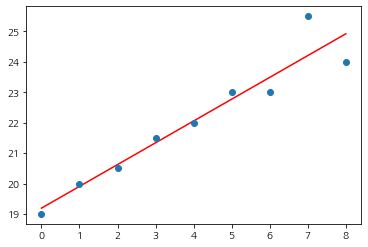

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 9)
A = np.array([x, np.ones(9)])
y = [19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]
w = np.linalg.lstsq(A.T, y)[0] # 최소 제곱법
line = w[0]*x+w[1] # 기울기, 절편
plt.plot(x, line, 'r-')
plt.plot(x, y, 'o')
plt.show()

In [27]:
#보스턴 집값 예측
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston # Bunch => 분석을 위해 데이터프레임으로 변환
import matplotlib.pyplot as plt
import pandas as pd
boston = load_boston()
# data : 독립변수
# target : 종속변수
# feature_names : 변수 이름
# DESCR : 설명
dfx = pd.DataFrame(boston.data, columns=boston.feature_names) # 독립변수
dfy = pd.DataFrame(boston.target, columns=["MEDV"]) # 종속변수
print(dfx.head)
dfy.head()

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0     21.0  396.90   5.64
504  0.109

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [19]:
type(boston)
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [197]:
model_boston = LinearRegression().fit(boston.data, boston.target) # 독립변수, 종속변수
type(boston)
print()
print(model_boston.coef_) # 갯수 : _붙으면 갯수
print()
print(boston.feature_names)
print()
print(model_boston.intercept_) # 절편


[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

36.459488385089855


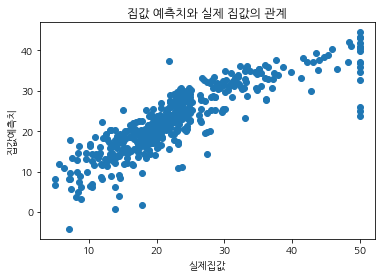

In [88]:
predictions = model_boston.predict(boston.data) #예측값
plt.scatter(boston.target, predictions)
plt.xlabel(u"실제집값")
plt.ylabel(u"집값예측치")
plt.title("집값 예측치와 실제 집값의 관계")
plt.show()

In [25]:
#문제 예측값과 실제값의 차를 출력하시오
print(predictions - boston.target)


[ 6.00384338e+00  3.42556238e+00 -4.13240328e+00 -4.79296351e+00
 -8.25647577e+00 -3.44371554e+00  1.01808268e-01 -7.56401157e+00
 -4.97636315e+00  2.02621071e-02  3.99949651e+00  2.68679568e+00
 -7.93478472e-01 -8.47097189e-01  1.08348205e+00 -6.02516792e-01
 -2.57249021e+00 -5.88598653e-01 -4.02198894e+00  2.06136033e-01
 -1.07614247e+00 -1.92896331e+00  6.32881292e-01 -6.93714654e-01
  7.83383155e-02 -5.13314391e-01 -1.13602345e+00 -9.15257194e-02
  1.14737285e+00 -1.23571798e-01 -1.24488241e+00  3.55923295e+00
 -4.38894264e+00  1.18275814e+00  2.06758913e-01  4.91463526e+00
  2.34193708e+00  2.10891142e+00 -1.78497388e+00  5.57625688e-01
 -6.84897746e-01  1.42056414e+00 -9.61337195e-02 -9.02072745e-02
  1.74149176e+00  2.79669817e+00  4.23200323e-01  1.43655088e+00
 -5.29344623e+00 -2.19392249e+00  1.58152535e+00  3.47222285e+00
  2.65585080e+00  6.49018091e-01 -3.53815230e+00 -4.24735053e+00
  1.56869782e-01  1.50919806e+00 -1.52462013e+00  1.48493555e+00
 -8.27419603e-01  2.51110

In [ ]:
"""
Ridge = linear regression + regularization 규제
-다중공선성으로 인한 과적합 방지
-규제의 강도를 조절하는 매개변수가 alpha
-하이퍼 파라메터
"""

In [50]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
#train test 추출
#stratify 층화분리 (데이터의 Y값이 치우치지 않게)
#random_state 의사난수 : 값을 주면 같은 값이 나옴

ridge = Ridge(alpha=1).fit(X_train, y_train) # 튜닝
#ridge fitting된 모델 생성

# R^2 : 독립변수가 종속변수를 설명하는 정도 : 설명력
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train))) # 성공률 75%
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test))) # 성공률 73%

훈련 세트 점수 : 0.75
테스트 세트 점수 : 0.73


In [58]:
lasso = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))

훈련 세트 점수 : 0.77
테스트 세트 점수 : 0.74


In [59]:
# 비선형회귀
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

In [64]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
# plt.plot(xfit, yfit)            

TypeError: unhashable type: 'slice'

In [68]:
"""
        실제값
예측값  TP       FP
        TN       FN
recall(재현율)   specificity 특이도 
sensitivity(민감도)
= TP/(TP+TN)     = FN/(FP+FN)

"""

from sklearn.metrics import accuracy_score # 모델 평가 : 정확도
x_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
print(accuracy_score(y_true, x_pred, normalize=True))
accuracy_score(y_true, x_pred, normalize=False)

0.5


2

In [69]:
"""
support vector machine
서포트 벡터를 이용해서 그룹간 간격을 멀리한다

"""

from sklearn import svm, datasets 
from sklearn.model_selection import cross_val_score
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf = svm.SVC(gamma='scale', random_state=0) #SVC, SVR 클래시파이, 리그레스 (예측 분류)
cross_val_score(clf, X, y, scoring='recall_macro', cv=5) # 재현율을 이용해서 평가

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [103]:
from sklearn.metrics import confusion_matrix
y_true = [2,0,2,2,0,1]
y_pred = [0,0,2,2,0,2]
"""
  0 1 2
0
1
2
카운팅
"""
confusion_matrix(y_true, y_pred) # 혼동행렬 : 대각선이 정분류율, 나머지는 틀림

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1
           2       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.44      0.56      0.49         6
weighted avg       0.56      0.67      0.60         6



C:\Users\2-18\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
import sklearn.metrics as metrics

y = np.array([1,1,1,1,0,0]) #실제값
p = np.array([1,1,0,0,0,0]) #예측값
print(metrics.confusion_matrix(y, p))
accuracy = np.mean(np.equal(y, p)) # =4/6 정확도
right = np.sum(y*p == 1) # 2개
precision = right/np.sum(p) # 2/2 정밀도
recall = right/np.sum(y) # 2/4  재현율
f1 = 2 * precision*recall/(precision+recall) # 평가방법 ( 정밀도하고 재현율 구현(=민감도)) 에프원스코어
print()
print('accuracy', accuracy)
print('precision', precision)
print('recall', recall)
print('f1', f1)
print()
# 분류에 대한 평가함수들 : 범주형 데이터 평가
# 예측 : 연속형 데이터 : mse, mae(mean abs error) 절대값 에러
# rmse(root mean square error)
# ★
print('accuracy', metrics.accuracy_score(y,p))
print('precision', metrics.precision_score(y,p))
print('recall', metrics.recall_score(y,p))
print('f1', metrics.f1_score(y,p))
print()
print(metrics.classification_report(y,p))
print(metrics.confusion_matrix(y,p))
      

[[2 0]
 [2 2]]

accuracy 0.6666666666666666
precision 1.0
recall 0.5
f1 0.6666666666666666

accuracy 0.6666666666666666
precision 1.0
recall 0.5
f1 0.6666666666666666

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6

[[2 0]
 [2 2]]


In [ ]:
"""
marco avg : 단순평균
weighted avg : 가중평균
"""
# 오전 종료 ===========================================================================================================================================================================================================

C:\Users\2-18\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\2-18\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


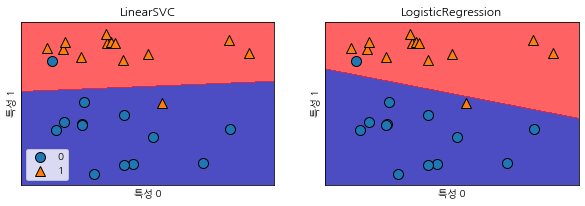

In [112]:
# 두개 모델을 씀
from sklearn.linear_model import LogisticRegression 
# 분류 한다 : 독립변수가 연속형, 종속변수가 범주형
# sigmoid 를 사용 : 0 ~ 1 : 확률값으로 뷴류
from sklearn.svm import LinearSVC #Support vector machine
import matplotlib.pyplot as plt
import mglearn

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.7) 
    #분할면
    # eps epsion 상수 : 부동소수점 : 0.5밑은 다같은 수 : 미세하게 조정 안해도된다는 뜻
    
    mglearn.discrete_scatter(X[:,0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
axes[0].legend()


In [113]:
data = pd.read_csv("Parkinson.csv")
data.head()
#status 종속변수

,name,status,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,1,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,0.607859,1.119147,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,phon_R01_S01_2,1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,1.547912,2.276504,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,phon_R01_S01_3,1,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,1.175643,1.726176,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,phon_R01_S01_4,1,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,1.340547,1.848749,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,phon_R01_S01_5,1,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,1.899444,2.532491,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082


In [120]:
# 결측치 제거 (행으로)
# 문제 데이터 train/test 데이터로 분할하시오

data.dropna(axis=1)

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2) # 8:2

train_data.head()



,name,status,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
128,phon_R01_S32_1,1,-0.852578,-0.762376,-0.163757,-0.376464,-0.113985,-0.394037,-0.554658,-0.395243,-1.030338,-0.947907,-1.015509,-1.015461,-0.944878,-1.015526,-0.188692,1.122695,-0.395414,-0.331777,-1.108713,-0.884336,-0.139630,-1.042360
121,phon_R01_S27_7,1,0.547318,0.199307,-0.745540,-0.335105,-0.401899,-0.410928,-0.449276,-0.409882,-0.958030,-0.850159,-1.019459,-0.965431,-0.771538,-1.019147,-0.328344,1.196091,-0.949580,-1.121812,0.895146,0.662418,0.717408,0.314362
60,phon_R01_S17_1,0,1.330191,0.442588,-0.160002,-0.703201,-0.977729,-0.620376,-0.700012,-0.619330,-0.590112,-0.577493,-0.583993,-0.441785,-0.607073,-0.584005,-0.400278,0.830923,-1.511915,-0.710679,-1.247103,-1.917457,0.206814,-1.168517
44,phon_R01_S10_3,0,2.160905,0.589624,2.674758,-0.852094,-1.006520,-0.748748,-0.754520,-0.748827,-0.825112,-0.803857,-0.779508,-0.741964,-0.813542,-0.779852,-0.503714,0.788788,-0.581043,-1.500424,-1.263069,-1.621586,-0.133860,-1.280279
81,phon_R01_S20_4,1,-1.420016,-0.979544,-0.662885,0.165341,0.749759,0.328898,0.095804,0.327691,0.098406,0.070732,0.222754,0.044338,-0.129057,0.223080,-0.163640,-0.504479,0.747997,1.098819,0.507964,-0.192956,-0.390895,0.601653


In [ ]:
# train data : status 비율 확인 # 열 series

In [121]:
# 도수분포표 : 
train_data['status'].value_counts()
test_data['status'].value_counts()

1    29
0    10
Name: status, dtype: int64

In [ ]:
"""
전처리정리
-결측치 : dropna, fillna, 사이킷 : Simpleimputer(mean, median)계산하고 채운다 , KNNimputer()계산하고 채운다: 가장나음
-이상치 : boxplot + fillter, z점수
-범주화 : LabelEncoder, Binarizer, OneHotEncoder, DictVectorizer
-정규화 : 
    - StandardScaler(z점수 정규화), Normalize(방향값으로)
    - MinMaxScaler, RobustScaler
-시각화 > 100개 이상일경우(시각화불가능) => 특성 추출하여 2개나 3개로 줄인다 => PCA
    - ★
    - PCA (Principle component analysisi) : 주성분분석
        - 고유값분해 => 고유값과 고유벡터
    - MDS (Multi Diemension Scale) : 4차원 척도법 : 분석불가능
        - 행렬연산으로 축소 ex : 50x100 100x3 직교하는축(임의의 숫자로 결정) => 50x3
        - 자기자신을 거듭제곱하면 정방이면서 대칭인 행렬이 나온다
        - 고유값 분해 => 직교하는축
"""

C:\Users\2-18\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-18\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


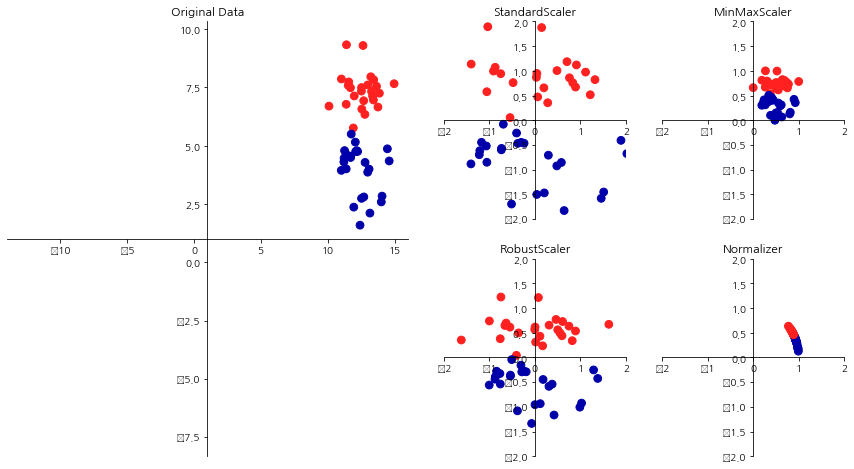

In [122]:
import mglearn
import matplotlib.pyplot as plt
mglearn.plots.plot_scaling()
# Z점수 = 데이타 - 평균

[-3. -2. -1.  0.  1.  2.  3.  4.  5.  6.]


C:\Users\2-18\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-18\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


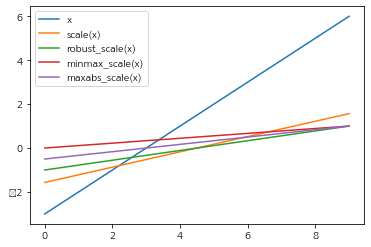

In [124]:
# h : horizontal 수평으로 v : vertical 수직으로 : h, v 앞에 붙으면 이런뜻일것
# 전처리 후 범위 출력
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
print(np.arange(10, dtype=np.float) - 3)
x = (np.arange(10, dtype=np.float) - 3).reshape(-1, 1) #열로 만들어라
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]),
                 columns=['x', 'scale(x)', 'robust_scale(x)', 'minmax_scale(x)', 'maxabs_scale(x)'])
df.plot()

<class 'sklearn.utils.Bunch'>
전처리전 평균: [5.84333333 3.05733333 3.758      1.19933333]
전처리전 std:: [0.82530129 0.43441097 1.75940407 0.75969263]
전처리후 mean: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
전처리후 std: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]


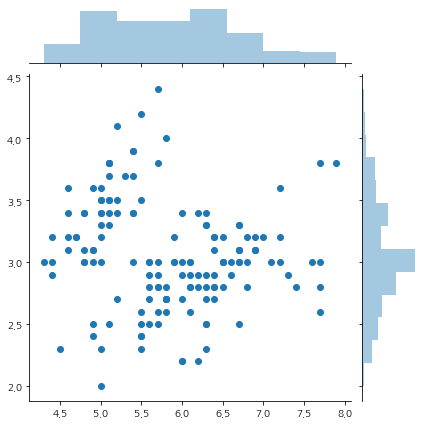

C:\Users\2-18\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-18\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


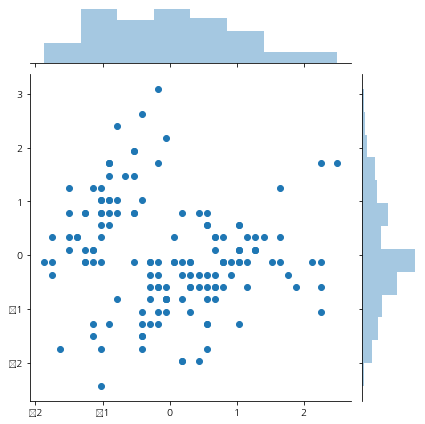

In [126]:
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris() # 105 x 4 (Sepal_Length, Sepal_width, Patal_Length, Petal_width)
print(type(iris))
data1 = iris.data
data2 = scale(iris.data) # scale해도 형태는 같다
print("전처리전 평균:", np.mean(data1, axis=0))#열평균
print("전처리전 std::", np.std(data1, axis=0))

print("전처리후 mean:", np.mean(data2, axis=0))
print("전처리후 std:", np.mean(data2, axis=0))

sns.jointplot(data1[:,0], data1[:,1]) 
plt.show()

sns.jointplot(data2[:,0], data2[:,1])
plt.show()

In [133]:
from sklearn import preprocessing
x = [[1., -1., 2.],
     [2., 0., 0.],
     [0., 1., -1.]]
# 방향값으로 표현
X_normalize = preprocessing.normalize(x, norm='l2') # 피타고라스로 생성된 크기값으로 정규화한다 l1절대값 l2제곱값
X_normalize
     

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [134]:
from sklearn.preprocessing import PolynomialFeatures #다항식 변경
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [135]:
poly = PolynomialFeatures(2)# 2차원으로 버꿔라 [1, a, b, a^2, ab, b^2] (위에 행하나가 a b)=> 2차원 => 회귀(비선형회귀)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [196]:
#전처리정리
#-결측치
#SimpleImputer
#서브 모듈
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy="mean") # mean, median, most_frequency(최빈수) # 열기준
imp_mean.fit(
    [[7, 2, 3], 
     [4, np.nan, 6], 
     [10, 5, 9]])

X = [[np.nan, 2, 3], 
     [4, np.nan, 6], 
     [10, np.nan, 9]]
print(imp_mean.transform(X))


[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


In [143]:
SimpleImputer?

In [139]:
#KNN
from sklearn.impute import KNNImputer
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2) # k개 nearest neighbor
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [152]:
KNNImputer??

In [162]:
# 사분위수를 이용한 이상치 제거
from sklearn.datasets import load_boston

dataset= [10,12,12,13,12,11,14,13,15,10,10,10,100,12,14,13, 12,10, 10,11,12,15,12,13,12,11,14,13,15,10,15,12,10,14,13,15,10] 

dataset = sorted(dataset)
print(dataset)
# 백분위수를 구하는 함수
# 1사분위수, 3사분위수
q1, q3 = np.percentile(dataset, [25, 75])
igr = q3 - q1 # inter quntile range 3사분위수 - 1사분위수

lower_bound = q1 - (1.5 * igr) # 이상치 하한선
upper_bound = q3 + (1.5 * igr) # 이상치 상한선
print(lower_bound)
print(upper_bound)
print()
print(dataset < lower_bound) # 이상치 확인
print(dataset > upper_bound)
#에러 나는것을 수정해보자


dataset = np.array(dataset) # 추가
dataset[dataset < upper_bound] # 불린 인덱싱은 넘파이 파이썬만 가능


[10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 15, 100]
6.5
18.5

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True]


array([10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15,
       15, 15])

In [166]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X = np.array([[0], [1], [2]]) # 범주의 개수만큼 변수로 변경
X
ohe.fit(X)
ohe.categories_


[array([0, 1, 2])]

In [167]:
print(ohe.transform(X))

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0


In [169]:
print(ohe.transform(X).toarray())

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [187]:
# 문제 : 원핫인코딩 하여라
#np.array([[0, 0, 4], [1, 1, 0], [0, 2, 1], [1, 0, 2], [1, 1, 3]])


X = np.array([[0, 0, 4],
              [1, 1, 0],
              [0, 2, 1],
              [1, 0, 2],
              [1, 1, 3]])
X
ohe.fit(X)#학습
print(ohe.categories_)# 카테고리 확인 -> 각행의 범주
print(ohe.transform(X))# 트랜스폼
print(ohe.transform(X).toarray())#배열화 5x3 -> 5x10 : 5x(2+3+5)

[array([0, 1]), array([0, 1, 2]), array([0, 1, 2, 3, 4])]
  (0, 0)	1.0
  (0, 2)	1.0
  (0, 9)	1.0
  (1, 1)	1.0
  (1, 3)	1.0
  (1, 5)	1.0
  (2, 0)	1.0
  (2, 4)	1.0
  (2, 6)	1.0
  (3, 1)	1.0
  (3, 2)	1.0
  (3, 7)	1.0
  (4, 1)	1.0
  (4, 3)	1.0
  (4, 8)	1.0
[[1. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 1. 0.]]


In [188]:
from sklearn.preprocessing import LabelEncoder # 레이블로 범주화
le = LabelEncoder()
le.fit([1, 2, 2, 6])
le.classes_

array([1, 2, 6])

In [189]:
le.transform([1, 1, 2, 6]) # [1, 2, 6]과 인덱스

array([0, 0, 1, 2], dtype=int64)

In [190]:
le.inverse_transform([0, 0, 1, 2]) # 원상태로 돌려놓기

array([1, 1, 2, 6])

In [193]:
# Dict를 벡터로 변환 (범주화)
# text mining(텍스트의 출현횟수 추출) 할때 사용
# 책을 분석 -> 책에 단어 찾고 -> 갯수를 카운트 -> 많은 단어가 중심단어
# 같이 나타나는 단어들 -> 특징화 추출 SVD
# : topic analysis : 문서의 주제분석
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 1}] # key값으로 범주화 값은 범주의 순서에 따라 지정
X = v.fit_transform(D) # 학습, 변형
X

array([[2., 0., 1.],
       [0., 1., 3.]])

In [194]:
v.feature_names_

['bar', 'baz', 'foo']

In [195]:
v.inverse_transform(X) #dict는 순서가 중요하지 않음 (key로 하니까)

[{'bar': 2.0, 'foo': 1.0}, {'baz': 1.0, 'foo': 3.0}]